In [12]:
import json #use for json data and json string to python object (list,dict)
import requests # Working for HTTP requests in Python
import pandas as pd # Open-source data manipulator and analysis Library for python
from datetime import datetime # Supplies classes to work with date and time
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
import os
from dotenv import load_dotenv

In [25]:
#load .env file
load_dotenv('.env')
api_key = os.getenv('API_KEY')

#lattiture and longitude of philippines
lat = 12.8797
lon= 121.7740

# openweather api
url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

#this will get the reponse
response = requests.get(url)

ron123


In [12]:
# print(json.dumps(response.json(),indent=2))

In [14]:
#convert temperature from kelvin to celsius
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

In [15]:
if response.status_code == 200:
    data = response.json() #parse json format into python object
    weather_data = [] # this will store array of objects|dictionary
    for data in data['list']:
        date_time = datetime.utcfromtimestamp(data['dt']).strftime('%Y-%m-%d %H:%M:%S')
        temp = kelvin_to_celsius(data['main']['temp'])
        feels_like = kelvin_to_celsius(data['main']['feels_like'])
        pressure = data['main']['pressure']
        humidity = data['main']['humidity']
        weather_main = data['weather'][0]['main']
        weather_description = data['weather'][0]['description']
        wind_speed = data['wind']['speed']
        wind_direction = data['wind']['deg']
        cloudiness = data['clouds']['all']
        rain_volume = data.get('rain',{}).get('3h',0)
        
        weather_data.append({
            "DateTime": date_time,
            "Temperature": temp,
            "Feels_Like_temp": feels_like,
            "Pressure": pressure,
            "Humidity": humidity,
            "WeatherMain": weather_main,
            "WeattherDescription": weather_description,
            "WindSpeed": wind_speed,
            "WindDirection": wind_direction,
            "Cloudiness": cloudiness,
            "RainVolume": rain_volume
            
        })
    
    df = pd.DataFrame(weather_data)
    

    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             40 non-null     object 
 1   Temperature          40 non-null     float64
 2   Feels_Like_temp      40 non-null     float64
 3   Pressure             40 non-null     int64  
 4   Humidity             40 non-null     int64  
 5   WeatherMain          40 non-null     object 
 6   WeattherDescription  40 non-null     object 
 7   WindSpeed            40 non-null     float64
 8   WindDirection        40 non-null     int64  
 9   Cloudiness           40 non-null     int64  
 10  RainVolume           40 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 3.6+ KB


In [17]:
#convert datetime from object to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

#Extract day and hour from datetime
df['Day'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

# pivot the DataFrame
df_pivot = df.pivot(index='Day', columns='Hour', values='Temperature')
df_pivot.fillna(0,inplace=True)

In [18]:
average_value = df['Temperature'].mean()

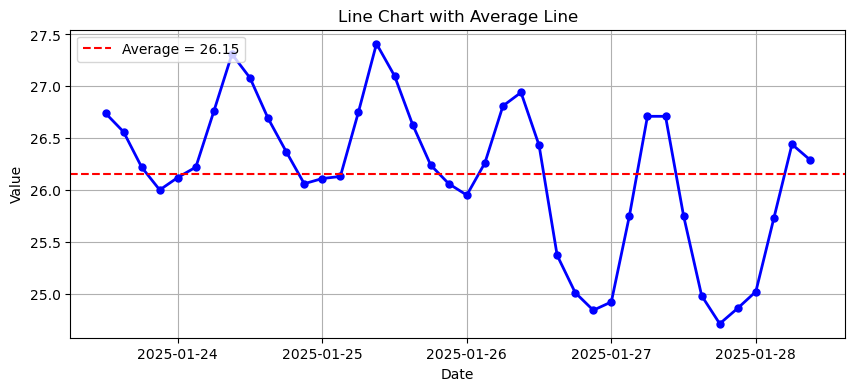

In [19]:
# visualization this will show the average temperature and the temperature per hour
plt.figure(figsize=(10,4)) #10 x 4 canva
plt.plot(df['DateTime'], df['Temperature'], color='b', linestyle='-', linewidth=2, marker='o', markersize=5)#plot x and y value with config
plt.axhline(y=average_value,color='r', linestyle='--', label=f'Average = {average_value:.2f}') #plot a horizontal line given the y value
plt.title('Line Chart with Average Line') #title
plt.xlabel('Date') #x-axis label
plt.ylabel('Value')#y-axis label
plt.legend(loc='upper left') #there is where your label resides
plt.grid(True) #with grid
plt.show() # show visual

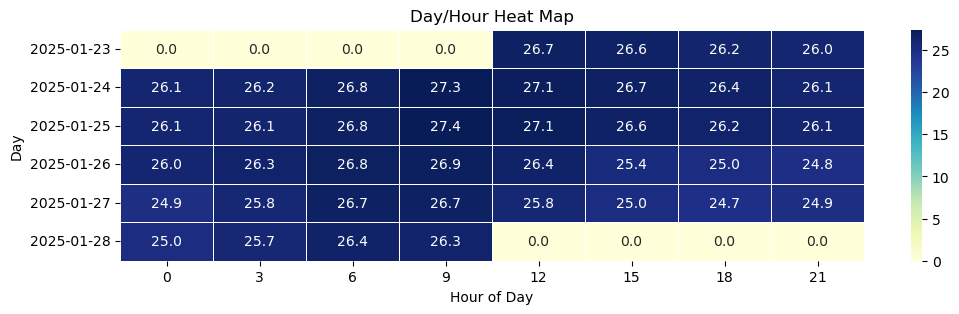

In [20]:
plt.figure(figsize=(12,3))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidth=.5) # annot display the number and fmt defines format one decimal place
plt.title('Day/Hour Heat Map')
plt.xlabel('Hour of Day')
plt.ylabel('Day')
plt.show()

In [21]:
import pandas as pd # For data transformation, manipulation, analysis, and cleaning
import psycopg2 # For connecting to postgresql database and executing queries
from sqlalchemy import create_engine # To efficiently manage and reuse database connections

In [27]:
#posgresql Credentials
password = os.getenv('password')

db_username = 'postgres'
db_password = password
db_host = 'localhost'
db_port =5432
db_name = 'postgres'

In [29]:
#create connection using sqlalchemy

engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

In [30]:
#Create table name
table_name = 'weather'

#load data into the table
df.to_sql(table_name, engine, if_exists='replace', index=False)

#close the engine connection
engine.dispose()